To run notebook on other machines at CSS
## jupyter notebook --ip xx.xx.xx.xxx --port xxxx


# MNIST Tutorial for CIS 4115

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

C:\Users\tgibbons\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
print ("Numpy version " , np.__version__)
print ("Keras version " , keras.__version__)

Numpy version  1.14.1
Keras version  2.1.4


In [5]:
from keras.datasets import mnist
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
print ("Training data is 60,000 images each 28x28 pixels greyscale: " ,X_train.shape)
print ("Testing data is 10,000 images each 28x28 pixels greyscale: " ,X_test.shape)

Training data is 60,000 images each 28x28 pixels greyscale:  (60000, 28, 28)
Testing data is 10,000 images each 28x28 pixels greyscale:  (10000, 28, 28)


Use the following code to display a sample of any image. 

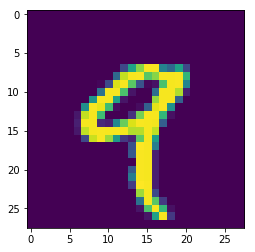

In [16]:
from matplotlib import pyplot as plt
plt.imshow(X_train[4])

## Reshape data
Keras expects inputs with three values for images. Generally the x, y, and depth of the image. So a 3x4 image 
Data we are starting with with shape of (3, 4) <br>
[ [ 9 9 9 ] <br>
&nbsp;&nbsp;[ 9 9 9 ] <br>
&nbsp;&nbsp;[ 9 9 9 ] <br>
&nbsp;&nbsp;[ 9 9 9 ] ] <br>
Data format after reshape that keras needs with with shape of (3, 4, 1) <br>
[ [ [ 9 9 9 ] <br>
&nbsp;&nbsp;&nbsp;[ 9 9 9 ] <br>
&nbsp;&nbsp;&nbsp;[ 9 9 9 ] <br>
&nbsp;&nbsp;&nbsp;[ 9 9 9 ] ] ]<br>

In [17]:
X_train2 = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test2 = X_test.reshape(X_test.shape[0], 28, 28, 1)
print (X_train.shape)
print (X_train2.shape)
print (X_train[:1])


(60000, 28, 28)
(60000, 28, 28, 1)
[[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
    18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
   253. 25

# Normalize image data
Greyscale pixel data is stored as integer values between 0-255.
<br>
Neural networks expect inputs between 0-1, so divide each pixel by 255 to normalize it. Also change the 

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train_norm = X_train / 255
X_test_norm = X_test / 255
X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')
X_train_norm2 = X_train2 / 255
X_test_norm2 = X_test2 / 255

In [19]:
print (X_train_norm2.shape)
print (X_train_norm2[:1])

(60000, 28, 28, 1)
[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
 

# reformat the output data

Output data is stored in arrays named "y" or y_train and y_test. <br>
Initiailly this is just the number, 0-9, that is represented by the image. <br>
Output should be an array of 10 different values each 0 or 1. <br>
So, convert 4 into [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

In [20]:
print (y_train[:10])


[5 0 4 1 9 2 1 3 1 4]


In [21]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print (Y_train.shape)
print (Y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [22]:
model = Sequential()

#model.add(Conv2D(32,(3,3), border_mode='same',kernel_initializer='uniform',input_shape=(28,28,1),dim_ordering='tf',name='conv_1.1'))
#model.add(Conv2D(16, 3,3, border_mode='same', input_shape=(1, 28, 28), activation='relu'))
#model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28)))
#model.add(Conv2D(32, (3, 3), activation="relu"))

model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#model.add(Dense(32, activation='relu', input_dim=(28*28)))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(10, activation='softmax'))




C:\Users\tgibbons\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [23]:
# 8. Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# 9. Fit model on training data
batch_size = 128
num_classes = 10
epochs = 12

#model.fit(X_train, Y_train, batch_size=32, epoch=10, verbose=1)
#model.fit(X_train, Y_train, batch_size=32, epochs=10)
model.fit(X_train_norm2, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_norm2, Y_test))
# 10. Evaluate model on test data
#score = model.evaluate(X_test, Y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 28s 467us/step - loss: 0.3272 - acc: 0.9012 - val_loss: 0.0955 - val_acc: 0.9706
Epoch 2/12
60000/60000 [==============================] - 28s 464us/step - loss: 0.1331 - acc: 0.9605 - val_loss: 0.0655 - val_acc: 0.9780
Epoch 3/12
60000/60000 [==============================] - 28s 466us/step - loss: 0.1009 - acc: 0.9702 - val_loss: 0.0539 - val_acc: 0.9802
Epoch 4/12
60000/60000 [==============================] - 28s 461us/step - loss: 0.0831 - acc: 0.9746 - val_loss: 0.0462 - val_acc: 0.9840
Epoch 5/12
60000/60000 [==============================] - 27s 447us/step - loss: 0.0731 - acc: 0.9774 - val_loss: 0.0439 - val_acc: 0.9856
Epoch 6/12
60000/60000 [==============================] - 27s 445us/step - loss: 0.0642 - acc: 0.9800 - val_loss: 0.0399 - val_acc: 0.9858
Epoch 7/12
60000/60000 [==============================] - 27s 445us/step - loss: 0.0586 - acc: 0.9815 - val_loss: 0.